In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Set theme
sns.set_theme(style='dark')
sns.set_palette(palette='Set2')

# Load and tidy data
%run tidy_data.py

# Load functions to estimate effect size
%run effect_size.py

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 174 non-null    object  
 1   age                174 non-null    int64   
 2   variant_histology  174 non-null    category
 3   ypT_stage          168 non-null    category
 4   ypN_stage          174 non-null    category
 5   recurrence         173 non-null    category
 6   fu_recurrence      174 non-null    int64   
 7   dod                171 non-null    category
 8   doc                170 non-null    category
 9   fu_censor          174 non-null    int64   
 10  sex                174 non-null    object  
 11  year_cystectomy    173 non-null    float64 
 12  ypT_group1         168 non-null    category
 13  ypT_group2         168 non-null    category
 14  ypN_group1         174 non-null    category
 15  ypN_group2         174 non-null    category
 16  dre     

# Tumor recurrence

## Tumor recurrence and age

In [2]:
df.groupby('recurrence')['age'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
recurrence,,,,,,,,
No,116.0,67.4,10.1,24.0,63.0,68.0,74.2,86.0
Yes,57.0,64.5,9.0,42.0,59.0,65.0,70.0,82.0


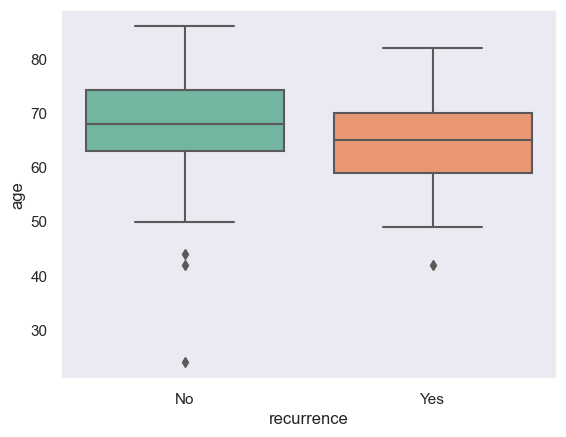

In [3]:
sns.boxplot(data=df, x='recurrence', y='age')
plt.show()

In [4]:
stats.shapiro(df['age'])

ShapiroResult(statistic=0.9705060124397278, pvalue=0.0009389412589371204)

In [5]:
stats.mannwhitneyu(*[df['age'].values for name, data in df.groupby('recurrence')])

MannwhitneyuResult(statistic=15138.0, pvalue=1.0)

In [6]:
rank_biserial_correlation(df['recurrence'], df['age'])

-0.15

## Tumor recurrence and sex

In [7]:
pd.crosstab(df['sex'], df['recurrence'])

recurrence,No,Yes
sex,,
Female,36,14
Male,80,43


In [8]:
pd.crosstab(df['sex'], df['recurrence'], normalize=True).round(2)

recurrence,No,Yes
sex,,
Female,0.21,0.08
Male,0.46,0.25


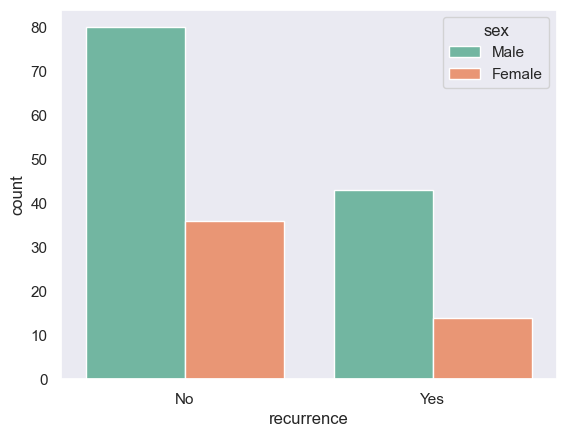

In [9]:
sns.countplot(data=df, x='recurrence', hue='sex')
plt.show()

In [10]:
stats.chi2_contingency(pd.crosstab(df['sex'], df['recurrence']))

(0.496157497577698,
 0.48119336767199616,
 1,
 array([[33.52601156, 16.47398844],
        [82.47398844, 40.52601156]]))

In [11]:
cramers_v(df['sex'], df['recurrence'])

0.0

## Tumor recurrence and variant histology

In [12]:
pd.crosstab(df['variant_histology'], df['recurrence'])

recurrence,No,Yes
variant_histology,,
No,74,36
Yes,42,21


In [13]:
pd.crosstab(df['variant_histology'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
variant_histology,,
No,0.67,0.33
Yes,0.67,0.33


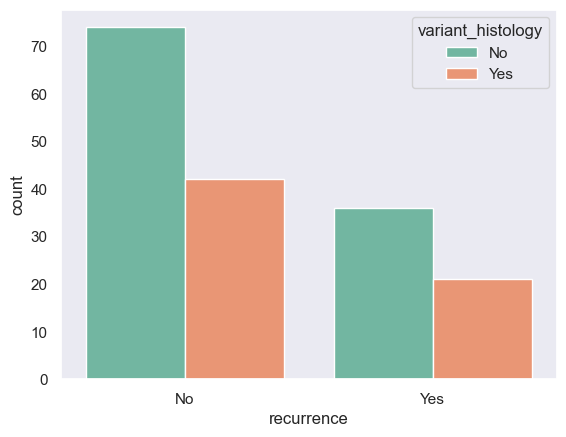

In [14]:
sns.countplot(data=df, x='recurrence', hue='variant_histology')
plt.show()

In [15]:
stats.chi2_contingency(pd.crosstab(df['variant_histology'], df['recurrence']))

(0.0,
 1.0,
 1,
 array([[73.75722543, 36.24277457],
        [42.24277457, 20.75722543]]))

In [16]:
cramers_v(df['variant_histology'], df['recurrence'])

0.0

## Tumor recurrence and ypT stage

In [17]:
pd.crosstab(df['ypT_group1'], df['recurrence'])

recurrence,No,Yes
ypT_group1,,
pT0-pTa-pTis,18,17
pT2-pT3,93,39


In [18]:
pd.crosstab(df['ypT_group1'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
ypT_group1,,
pT0-pTa-pTis,0.51,0.49
pT2-pT3,0.70,0.30


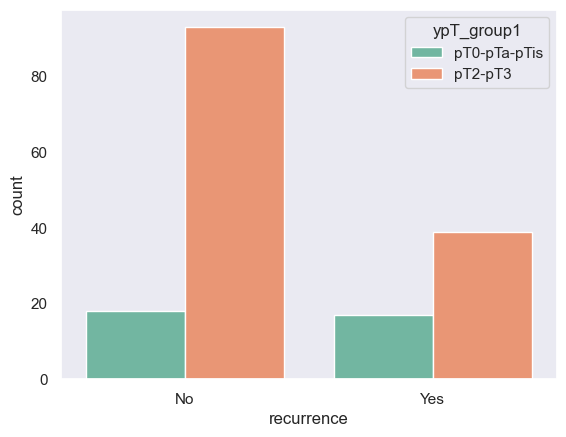

In [19]:
sns.countplot(data=df, x='recurrence', hue='ypT_group1')
plt.show()

In [20]:
stats.chi2_contingency(pd.crosstab(df['ypT_group1'], df['recurrence']))

(3.679966437332509,
 0.05506995864559386,
 1,
 array([[23.26347305, 11.73652695],
        [87.73652695, 44.26347305]]))

In [21]:
cramers_v(df['ypT_group1'], df['recurrence'])

0.13

In [22]:
pd.crosstab(df['ypT_group2'], df['recurrence'])

recurrence,No,Yes
ypT_group2,,
pT0-pTa-pTis,18,17
pT2,48,16
pT3,45,23


In [23]:
pd.crosstab(df['ypT_group2'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
ypT_group2,,
pT0-pTa-pTis,0.51,0.49
pT2,0.75,0.25
pT3,0.66,0.34


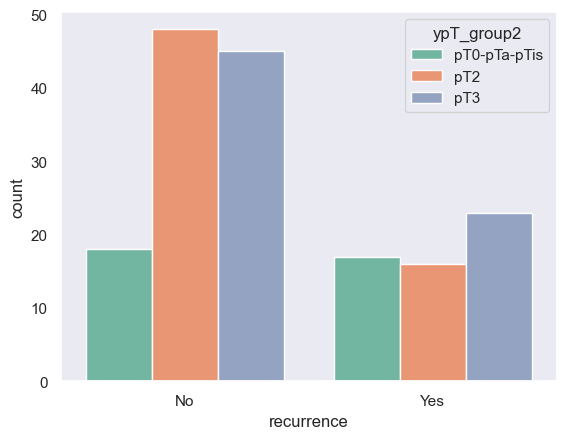

In [24]:
sns.countplot(data=df, x='recurrence', hue='ypT_group2')
plt.show()

In [25]:
stats.chi2_contingency(pd.crosstab(df['ypT_group2'], df['recurrence']))

(5.644702678368645,
 0.05946595356570589,
 2,
 array([[23.26347305, 11.73652695],
        [42.53892216, 21.46107784],
        [45.19760479, 22.80239521]]))

In [26]:
cramers_v(df['ypT_group2'], df['recurrence'])

0.15

## Tumor recurrence and ypN stage

In [27]:
pd.crosstab(df['ypN_group1'], df['recurrence'])

recurrence,No,Yes
ypN_group1,,
pN0,98,40
pN1-pN2-pN3,18,17


In [28]:
pd.crosstab(df['ypN_group1'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
ypN_group1,,
pN0,0.71,0.29
pN1-pN2-pN3,0.51,0.49


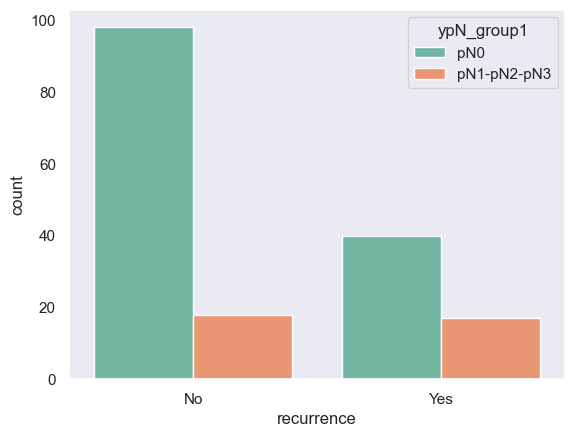

In [29]:
sns.countplot(data=df, x='recurrence', hue='ypN_group1')
plt.show()

In [30]:
stats.chi2_contingency( pd.crosstab(df['ypN_group1'], df['recurrence']))

(4.001823125091589,
 0.045451075781721036,
 1,
 array([[92.53179191, 45.46820809],
        [23.46820809, 11.53179191]]))

In [31]:
cramers_v(df['ypN_group1'], df['recurrence'])

0.13

In [32]:
pd.crosstab(df['ypN_group2'], df['recurrence'])

recurrence,No,Yes
ypN_group2,,
pN0,98,40
pN1,10,7
pN2-pN3,8,10


In [33]:
pd.crosstab(df['ypN_group2'], df['recurrence'], normalize='index').round(2)

recurrence,No,Yes
ypN_group2,,
pN0,0.71,0.29
pN1,0.59,0.41
pN2-pN3,0.44,0.56


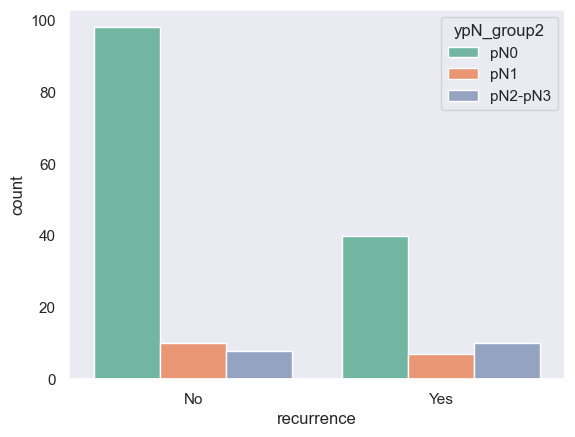

In [34]:
sns.countplot(data=df, x='recurrence', hue='ypN_group2')
plt.show()

In [35]:
stats.chi2_contingency(pd.crosstab(df['ypN_group2'], df['recurrence']))

(5.666071075229498,
 0.05883398954411584,
 2,
 array([[92.53179191, 45.46820809],
        [11.39884393,  5.60115607],
        [12.06936416,  5.93063584]]))

In [36]:
cramers_v(df['ypN_group2'], df['recurrence'])

0.15

# Death by cancer

## Death by cancer and age

In [37]:
df.groupby('doc')['age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
doc,,,,,,,,
No,152.0,66.14,9.97,24.0,60.00,67.0,73.0,86.0
Yes,18.0,68.50,9.07,50.0,61.25,70.0,76.0,80.0


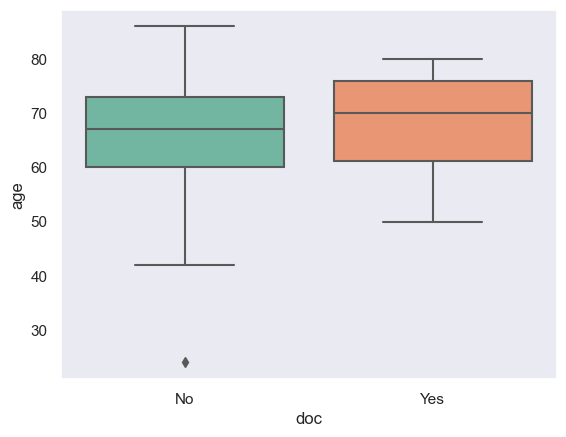

In [38]:
sns.boxplot(data=df, x='doc', y='age')
plt.show()

In [39]:
stats.mannwhitneyu(*[df['age'].values for name, data in df.groupby('doc')])

MannwhitneyuResult(statistic=15138.0, pvalue=1.0)

In [40]:
rank_biserial_correlation(df['doc'], df['age'])

0.03

## Death by cancer and sex

In [41]:
pd.crosstab(df['sex'], df['doc'])

doc,No,Yes
sex,,
Female,47,2
Male,105,16


In [42]:
pd.crosstab(df['sex'], df['doc'], normalize=True).round(2)

doc,No,Yes
sex,,
Female,0.28,0.01
Male,0.62,0.09


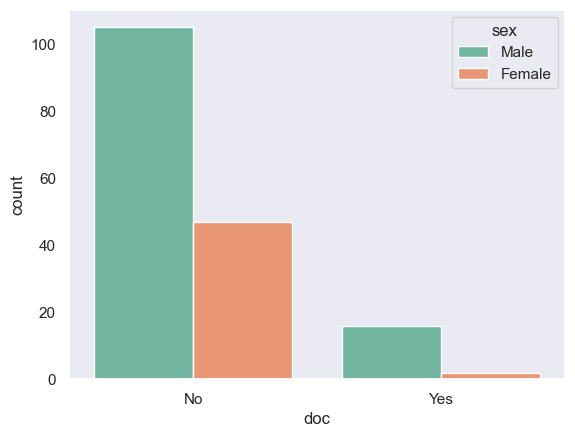

In [43]:
sns.countplot(data=df, x='doc', hue='sex')
plt.show()

In [44]:
stats.chi2_contingency(pd.crosstab(df['sex'], df['doc']))

(2.188687603503051,
 0.13902773091919954,
 1,
 array([[ 43.81176471,   5.18823529],
        [108.18823529,  12.81176471]]))

In [45]:
cramers_v(df['sex'], df['doc'])

0.08

## Death by cancer and variant histology

In [46]:
pd.crosstab(df['variant_histology'], df['doc'])

doc,No,Yes
variant_histology,,
No,94,13
Yes,58,5


In [47]:
pd.crosstab(df['variant_histology'], df['doc'], normalize='index').round(2)

doc,No,Yes
variant_histology,,
No,0.88,0.12
Yes,0.92,0.08


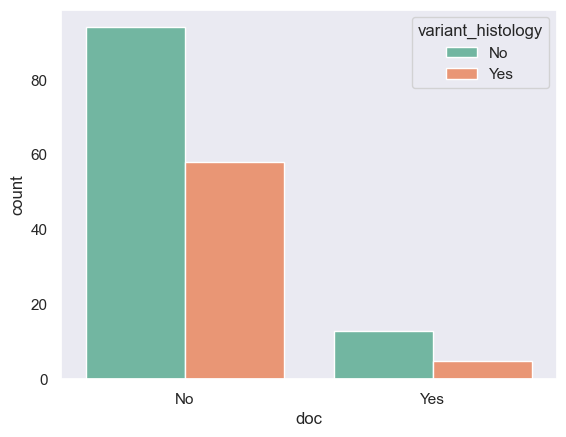

In [48]:
sns.countplot(data=df, x='doc', hue='variant_histology')
plt.show()

In [49]:
stats.chi2_contingency(pd.crosstab(df['variant_histology'], df['doc']))

(0.3650183133500071,
 0.5457323161426532,
 1,
 array([[95.67058824, 11.32941176],
        [56.32941176,  6.67058824]]))

In [50]:
cramers_v(df['variant_histology'], df['doc'])

0.0

## Death by cancer and ypT stage

In [51]:
pd.crosstab(df['ypT_group1'], df['dod'])

dod,No,Yes
ypT_group1,,
pT0-pTa-pTis,25,10
pT2-pT3,101,29


In [52]:
pd.crosstab(df['ypT_group1'], df['dod'], normalize='index').round(2)

dod,No,Yes
ypT_group1,,
pT0-pTa-pTis,0.71,0.29
pT2-pT3,0.78,0.22


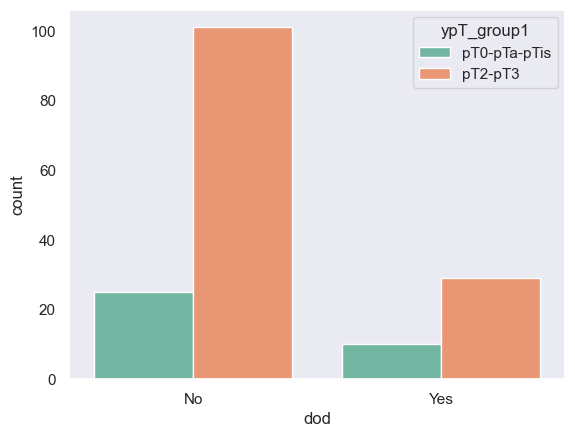

In [53]:
sns.countplot(data=df, x='dod', hue='ypT_group1')
plt.show()

In [54]:
stats.chi2_contingency(pd.crosstab(df['ypT_group1'], df['dod']))

(0.3026129090689529,
 0.5822489794567378,
 1,
 array([[26.72727273,  8.27272727],
        [99.27272727, 30.72727273]]))

In [55]:
cramers_v(df['ypT_group1'], df['dod'])

0.0

In [56]:
pd.crosstab(df['ypT_group2'], df['dod'])

dod,No,Yes
ypT_group2,,
pT0-pTa-pTis,25,10
pT2,50,13
pT3,51,16


In [57]:
pd.crosstab(df['ypT_group2'], df['dod'], normalize='index').round(2)

dod,No,Yes
ypT_group2,,
pT0-pTa-pTis,0.71,0.29
pT2,0.79,0.21
pT3,0.76,0.24


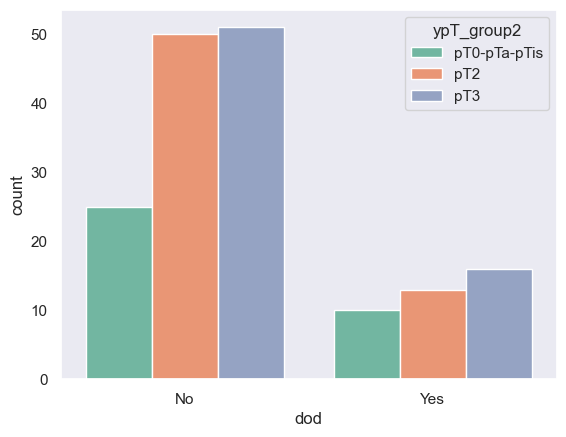

In [58]:
sns.countplot(data=df, x='dod', hue='ypT_group2')
plt.show()

In [59]:
stats.chi2_contingency(pd.crosstab(df['ypT_group2'], df['dod']))

(0.7889169189808845,
 0.6740449630822025,
 2,
 array([[26.72727273,  8.27272727],
        [48.10909091, 14.89090909],
        [51.16363636, 15.83636364]]))

In [60]:
cramers_v(df['ypT_group2'], df['dod'])

0.0

## Death by cancer and ypN stage

In [61]:
pd.crosstab(df['ypN_group1'], df['dod'])

dod,No,Yes
ypN_group1,,
pN0,105,31
pN1-pN2-pN3,25,10


In [62]:
pd.crosstab(df['ypN_group1'], df['dod'], normalize='index').round(2)

dod,No,Yes
ypN_group1,,
pN0,0.77,0.23
pN1-pN2-pN3,0.71,0.29


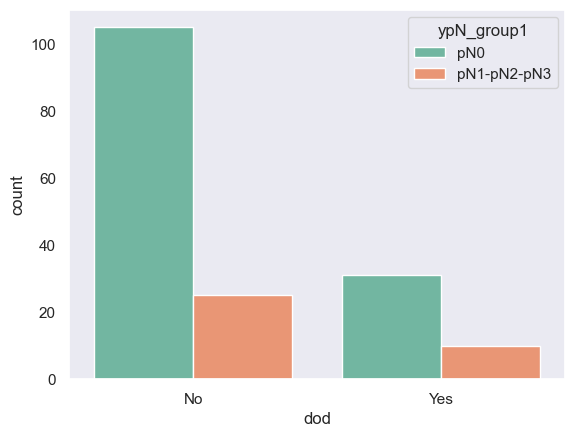

In [63]:
sns.countplot(data=df, x='dod', hue='ypN_group1')
plt.show()

In [64]:
stats.chi2_contingency(pd.crosstab(df['ypN_group1'], df['dod']))

(0.2420362286565659,
 0.6227392958794253,
 1,
 array([[103.39181287,  32.60818713],
        [ 26.60818713,   8.39181287]]))

In [65]:
cramers_v(df['ypN_group1'], df['dod'])

0.0

In [66]:
pd.crosstab(df['ypN_group2'], df['dod'])

dod,No,Yes
ypN_group2,,
pN0,105,31
pN1,13,4
pN2-pN3,12,6


In [67]:
pd.crosstab(df['ypN_group2'], df['dod'], normalize='index').round(2)

dod,No,Yes
ypN_group2,,
pN0,0.77,0.23
pN1,0.76,0.24
pN2-pN3,0.67,0.33


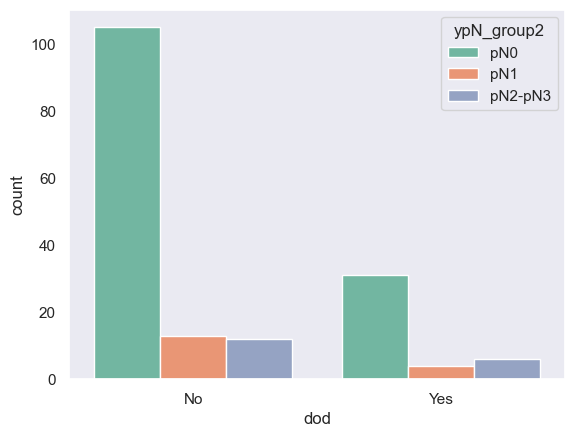

In [68]:
sns.countplot(data=df, x='dod', hue='ypN_group2')
plt.show()

In [69]:
stats.chi2_contingency(pd.crosstab(df['ypN_group2'], df['dod']))

(0.9707330868557557,
 0.6154715583589119,
 2,
 array([[103.39181287,  32.60818713],
        [ 12.92397661,   4.07602339],
        [ 13.68421053,   4.31578947]]))

In [70]:
cramers_v(df['ypN_group2'], df['dod'])

0.0

# Death by other causes

## Death by other causes and age

In [71]:
df.groupby('doc')['age'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
doc,,,,,,,,
No,152.0,66.14,9.97,24.0,60.00,67.0,73.0,86.0
Yes,18.0,68.50,9.07,50.0,61.25,70.0,76.0,80.0


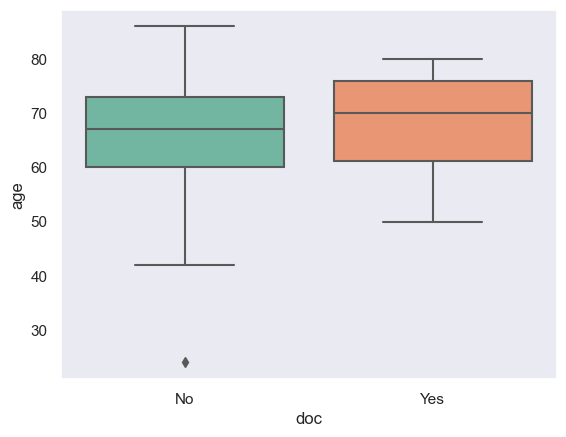

In [72]:
sns.boxplot(data=df, x='doc', y='age')
plt.show()

In [73]:
stats.mannwhitneyu(*[df['age'].values for name, data in df.groupby('doc')])

MannwhitneyuResult(statistic=15138.0, pvalue=1.0)

## Death by other causes and sex

In [74]:
pd.crosstab(df['sex'], df['doc'])

doc,No,Yes
sex,,
Female,47,2
Male,105,16


In [75]:
pd.crosstab(df['sex'], df['doc'], normalize='index').round(2)

doc,No,Yes
sex,,
Female,0.96,0.04
Male,0.87,0.13


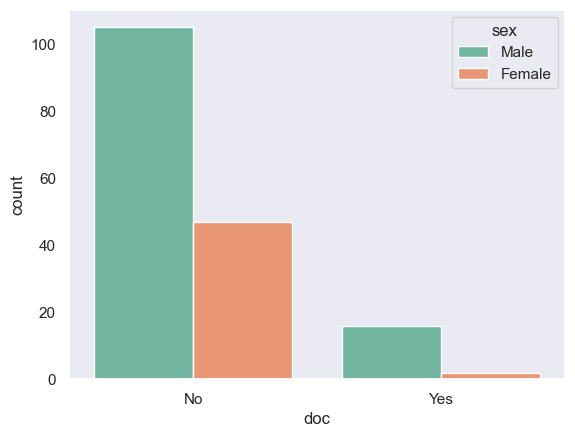

In [76]:
sns.countplot(data=df, x='doc', hue='sex')
plt.show()

In [77]:
stats.chi2_contingency(pd.crosstab(df['sex'], df['doc']))

(2.188687603503051,
 0.13902773091919954,
 1,
 array([[ 43.81176471,   5.18823529],
        [108.18823529,  12.81176471]]))

In [78]:
cramers_v(df['sex'], df['doc'])

0.08

## Death by other causes and variant histology

In [79]:
pd.crosstab(df['variant_histology'], df['doc'])

doc,No,Yes
variant_histology,,
No,94,13
Yes,58,5


In [80]:
pd.crosstab(df['variant_histology'], df['doc'], normalize='index').round(2)

doc,No,Yes
variant_histology,,
No,0.88,0.12
Yes,0.92,0.08


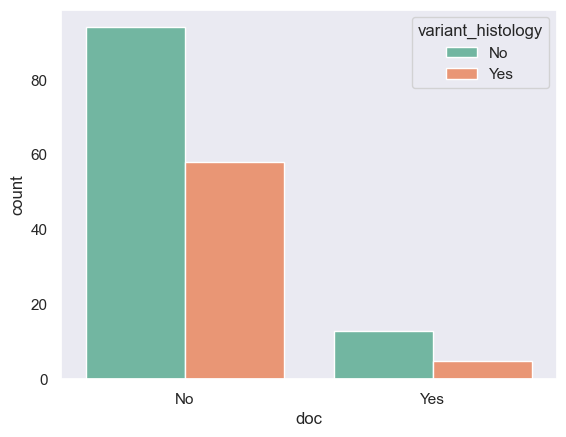

In [81]:
sns.countplot(data=df, x='doc', hue='variant_histology')
plt.show()

In [82]:
stats.chi2_contingency(pd.crosstab(df['variant_histology'], df['doc']))

(0.3650183133500071,
 0.5457323161426532,
 1,
 array([[95.67058824, 11.32941176],
        [56.32941176,  6.67058824]]))

In [83]:
cramers_v(df['variant_histology'], df['doc'])

0.0

## Death by other causes and ypT stage

In [84]:
pd.crosstab(df['ypT_group1'], df['doc'])

doc,No,Yes
ypT_group1,,
pT0-pTa-pTis,32,3
pT2-pT3,115,14


In [85]:
pd.crosstab(df['ypT_group1'], df['doc'], normalize='index').round(2)

doc,No,Yes
ypT_group1,,
pT0-pTa-pTis,0.91,0.09
pT2-pT3,0.89,0.11


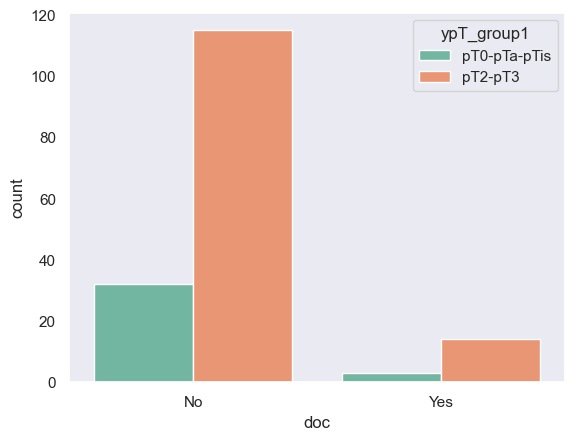

In [86]:
sns.countplot(data=df, x='doc', hue='ypT_group1')
plt.show()

In [87]:
stats.chi2_contingency(pd.crosstab(df['ypT_group1'], df['doc']))

(0.0064100058628102485,
 0.936187537915021,
 1,
 array([[ 31.37195122,   3.62804878],
        [115.62804878,  13.37195122]]))

In [88]:
cramers_v(df['ypT_group1'], df['doc'])

0.0

In [89]:
pd.crosstab(df['ypT_group2'], df['doc'])

doc,No,Yes
ypT_group2,,
pT0-pTa-pTis,32,3
pT2,55,7
pT3,60,7


In [90]:
pd.crosstab(df['ypT_group2'], df['doc'], normalize='index').round(2)

doc,No,Yes
ypT_group2,,
pT0-pTa-pTis,0.91,0.09
pT2,0.89,0.11
pT3,0.90,0.10


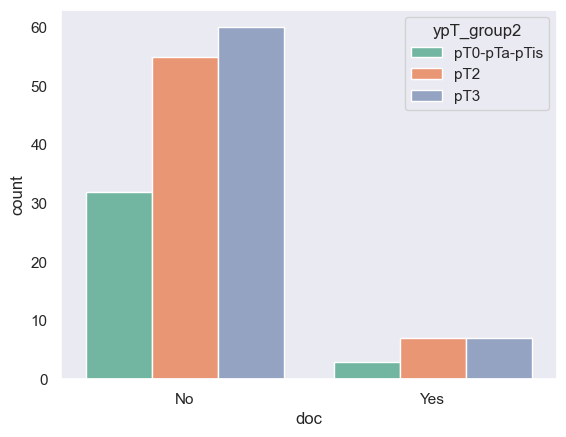

In [91]:
sns.countplot(data=df, x='doc', hue='ypT_group2')
plt.show()

In [92]:
stats.chi2_contingency(pd.crosstab(df['ypT_group2'], df['doc']))

(0.17880727089652834,
 0.9144763839852849,
 2,
 array([[31.37195122,  3.62804878],
        [55.57317073,  6.42682927],
        [60.05487805,  6.94512195]]))

In [93]:
cramers_v(df['ypT_group2'], df['doc'])

0.0

## Death by other causes and ypN stage

In [94]:
pd.crosstab(df['ypN_group1'], df['doc'])

doc,No,Yes
ypN_group1,,
pN0,120,15
pN1-pN2-pN3,32,3


In [95]:
pd.crosstab(df['ypN_group1'], df['doc'], normalize='index').round(2)

doc,No,Yes
ypN_group1,,
pN0,0.89,0.11
pN1-pN2-pN3,0.91,0.09


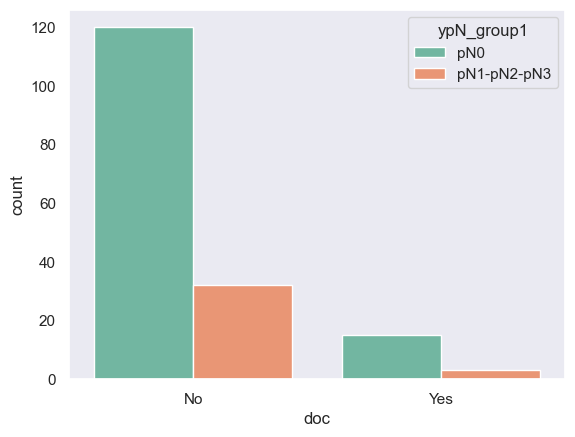

In [96]:
sns.countplot(data=df, x='doc', hue='ypN_group1')
plt.show()

In [97]:
stats.chi2_contingency(pd.crosstab(df['ypN_group1'], df['doc']))

(0.016108945202512454,
 0.8990029099890832,
 1,
 array([[120.70588235,  14.29411765],
        [ 31.29411765,   3.70588235]]))

In [98]:
cramers_v(df['ypN_group1'], df['doc'])

0.0

In [99]:
pd.crosstab(df['ypN_group2'], df['doc'])

doc,No,Yes
ypN_group2,,
pN0,120,15
pN1,14,3
pN2-pN3,18,0


In [100]:
pd.crosstab(df['ypN_group2'], df['doc'], normalize='index').round(2)

doc,No,Yes
ypN_group2,,
pN0,0.89,0.11
pN1,0.82,0.18
pN2-pN3,1.00,0.00


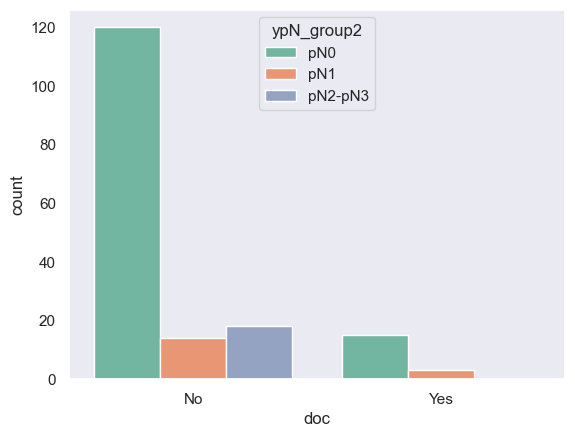

In [101]:
sns.countplot(data=df, x='doc', hue='ypN_group2')
plt.show()

In [102]:
stats.chi2_contingency(pd.crosstab(df['ypN_group2'], df['doc']))

(3.0653021442495123,
 0.21596237589858455,
 2,
 array([[120.70588235,  14.29411765],
        [ 15.2       ,   1.8       ],
        [ 16.09411765,   1.90588235]]))

In [103]:
cramers_v(df['ypN_group2'], df['doc'])

0.08

# Disease-related event

## Disease-related event and age

In [104]:
df.groupby('dre')['age'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
dre,,,,,,,,
No,102.0,66.9,10.2,24.0,63.0,68.0,74.0,86.0
Yes,72.0,65.9,9.4,42.0,59.8,66.5,74.0,82.0


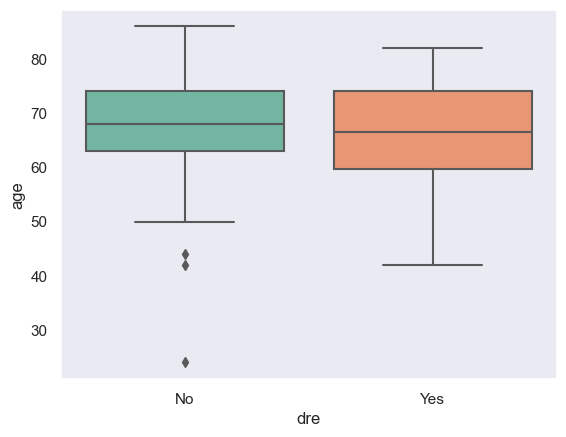

In [105]:
sns.boxplot(data=df, x='dre', y='age')
plt.show()

In [106]:
stats.mannwhitneyu(*[df['age'].values for name, data in df.groupby('dre')])

MannwhitneyuResult(statistic=15138.0, pvalue=1.0)

In [107]:
rank_biserial_correlation(df['dre'], df['age'])

-0.05

## Disease-related event and sex

In [108]:
pd.crosstab(df['sex'], df['dre'])

dre,No,Yes
sex,,
Female,34,16
Male,68,56


In [109]:
pd.crosstab(df['sex'], df['dre'], normalize='index').round(2)

dre,No,Yes
sex,,
Female,0.68,0.32
Male,0.55,0.45


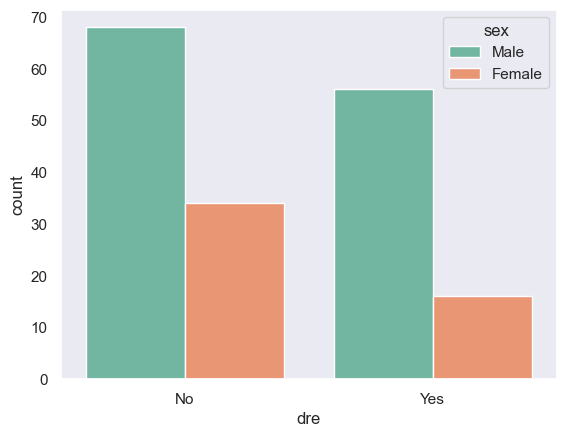

In [110]:
sns.countplot(data=df, x='dre', hue='sex')
plt.show()

In [111]:
stats.chi2_contingency(pd.crosstab(df['sex'], df['dre']))

(2.0308598197343457,
 0.15413338629374487,
 1,
 array([[29.31034483, 20.68965517],
        [72.68965517, 51.31034483]]))

In [112]:
cramers_v(df['sex'], df['dre'])

0.08

## Disease-related event and variant histology

In [113]:
pd.crosstab(df['variant_histology'], df['dre'])

dre,No,Yes
variant_histology,,
No,63,48
Yes,39,24


In [114]:
pd.crosstab(df['variant_histology'], df['dre'], normalize='index').round(2)

dre,No,Yes
variant_histology,,
No,0.57,0.43
Yes,0.62,0.38


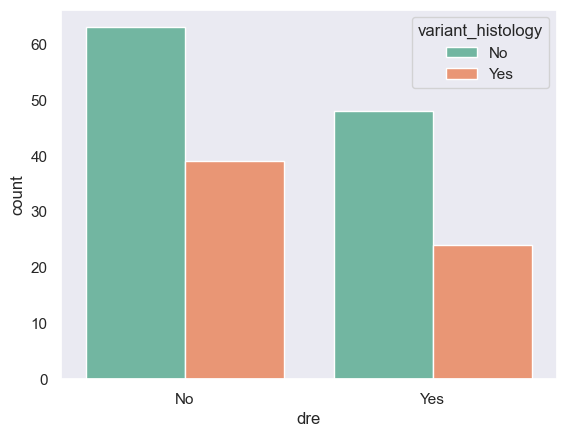

In [115]:
sns.countplot(data=df, x='dre', hue='variant_histology')
plt.show()

In [116]:
stats.chi2_contingency(pd.crosstab(df['variant_histology'], df['dre']))

(0.2525098628039809,
 0.6153133243473851,
 1,
 array([[65.06896552, 45.93103448],
        [36.93103448, 26.06896552]]))

In [117]:
cramers_v(df['variant_histology'], df['dre'])

0.0

## Disease-related event and ypT stage

In [118]:
pd.crosstab(df['ypT_group1'], df['dre'])

dre,No,Yes
ypT_group1,,
pT0-pTa-pTis,15,20
pT2-pT3,83,50


In [119]:
pd.crosstab(df['ypT_group1'], df['dre'], normalize='index').round(2)

dre,No,Yes
ypT_group1,,
pT0-pTa-pTis,0.43,0.57
pT2-pT3,0.62,0.38


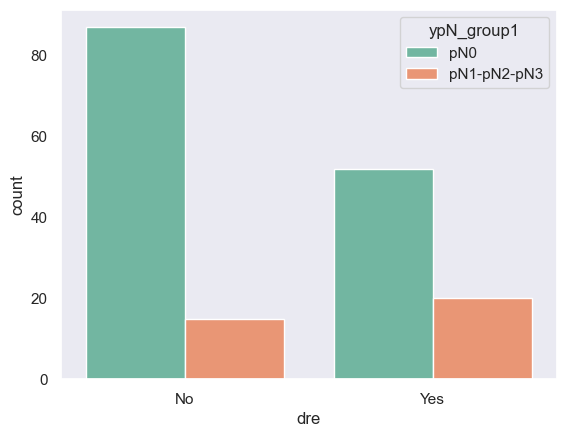

In [120]:
sns.countplot(data=df, x='dre', hue='ypN_group1')
plt.show()

In [121]:
stats.chi2_contingency(pd.crosstab(df['ypT_group1'], df['dre']))

(3.5894307196562836,
 0.05814815947931438,
 1,
 array([[20.41666667, 14.58333333],
        [77.58333333, 55.41666667]]))

In [122]:
cramers_v(df['ypT_group1'], df['dre'])

0.12

In [123]:
pd.crosstab(df['ypT_group2'], df['dre'])

dre,No,Yes
ypT_group2,,
pT0-pTa-pTis,15,20
pT2,42,23
pT3,41,27


In [124]:
pd.crosstab(df['ypT_group2'], df['dre'], normalize='index').round(2)

dre,No,Yes
ypT_group2,,
pT0-pTa-pTis,0.43,0.57
pT2,0.65,0.35
pT3,0.60,0.40


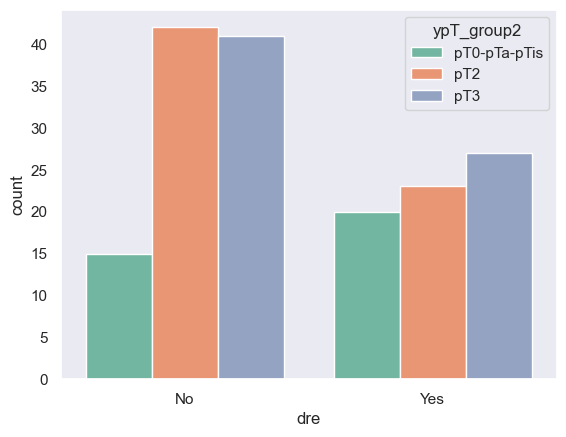

In [125]:
sns.countplot(data=df, x='dre', hue='ypT_group2')
plt.show()

In [126]:
stats.chi2_contingency(pd.crosstab(df['ypT_group2'], df['dre']))

(4.611927232431434,
 0.09966271775660204,
 2,
 array([[20.41666667, 14.58333333],
        [37.91666667, 27.08333333],
        [39.66666667, 28.33333333]]))

In [127]:
cramers_v(df['ypT_group2'], df['dre'])

0.12

## Disease-related event and ypN stage

In [128]:
pd.crosstab(df['ypN_group1'], df['dre'])

dre,No,Yes
ypN_group1,,
pN0,87,52
pN1-pN2-pN3,15,20


In [129]:
pd.crosstab(df['ypN_group1'], df['dre'], normalize='index').round(2)

dre,No,Yes
ypN_group1,,
pN0,0.63,0.37
pN1-pN2-pN3,0.43,0.57


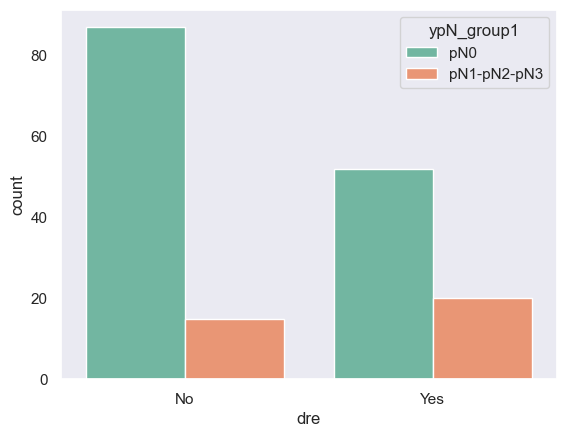

In [130]:
sns.countplot(data=df, x='dre', hue='ypN_group1')
plt.show()

In [131]:
stats.chi2_contingency(pd.crosstab(df['ypN_group1'], df['dre']))

(3.71160903210205,
 0.0540352775570698,
 1,
 array([[81.48275862, 57.51724138],
        [20.51724138, 14.48275862]]))

In [132]:
cramers_v(df['ypN_group1'], df['dre'])

0.13

In [133]:
pd.crosstab(df['ypN_group2'], df['dre'])

dre,No,Yes
ypN_group2,,
pN0,87,52
pN1,7,10
pN2-pN3,8,10


In [134]:
pd.crosstab(df['ypN_group2'], df['dre'], normalize='index').round(2)

dre,No,Yes
ypN_group2,,
pN0,0.63,0.37
pN1,0.41,0.59
pN2-pN3,0.44,0.56


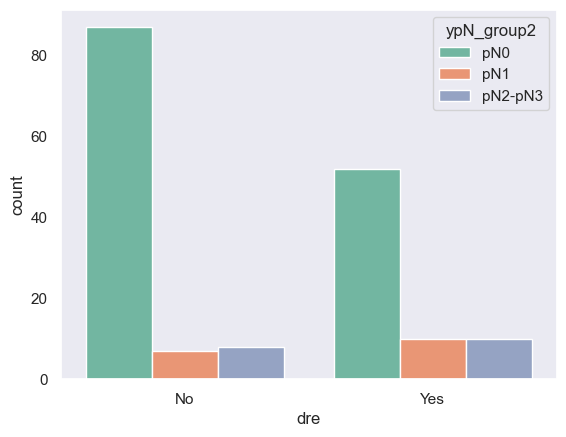

In [135]:
sns.countplot(data=df, x='dre', hue='ypN_group2')
plt.show()

In [136]:
stats.chi2_contingency(pd.crosstab(df['ypN_group2'], df['dre']))

(4.526733860892831,
 0.1039997347373506,
 2,
 array([[81.48275862, 57.51724138],
        [ 9.96551724,  7.03448276],
        [10.55172414,  7.44827586]]))

In [137]:
cramers_v(df['ypN_group2'], df['dre'])

0.12